## Part a - Quality control and trimming

Selected SRR accession numbers: SRR6191641, SRR6191642


In this step, we want to assess read qualities using FastQC software. After that, use the Trimmomatic software to improve the read qualities through the read trimming. And then, recheck the read qualities to make sure the problems are solved.

### FastQC

To assess the data, we have to install FastQC software using conda by the below command in terminal.

In [ ]:
! conda install bioconda::fastqc

After installation, it is time to run the ```fastqc``` coommand and get the ```html``` reports. I sat the output directory as ```Project2/fastqc_results```.

In [ ]:
! fastqc -o /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/fastqc_results/ /share_large/intro2bioinformatics/data/fastq/SRR6191641_1.fastq
! fastqc -o /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/fastqc_results/ /share_large/intro2bioinformatics/data/fastq/SRR6191641_2.fastq
! fastqc -o /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/fastqc_results/ /share_large/intro2bioinformatics/data/fastq/SRR6191642_1.fastq
! fastqc -o /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/fastqc_results/ /share_large/intro2bioinformatics/data/fastq/SRR6191642_2.fastq

Another thing to do is copy the results in the local by the below command in terminal:

In [ ]:
! scp -r bio_fatemeh_rashidi@172.18.57.208:project2/fastqc_results /Users/Fatemeh/Documents/term7/Bioinformatics/Project2

After runnig the above command, ```fastqc_results``` folder will copy in the specified local folder(```Project2/fastqc_results```).

Path to FastQC results: ```/share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/fastqc_results```

### Trimmomatic

Import nedded libraries for ploting results

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

First, we have to install this software using conda like below:

In [ ]:
! conda install bioconda::trimmomatic

Now, it's time to use this software for trimming the normal and tumor samples using the following commands, which take forward and backward reads. Additionally, based on the tip given, MINLEN and SLIDINGWINDOW were set to 80 and 5:30, respectively.

Normal sample trimming:

In [ ]:
! trimmomatic PE  /share_large/intro2bioinformatics/data/fastq/SRR6191641_1.fastq /share_large/intro2bioinformatics/data/fastq/SRR6191641_2.fastq /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results/trim_41_results/output41_1_trimmed.fastq /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results/trim_41_results/output41_1_unpaired.fastq /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results/trim_41_results/output41_2_trimmed.fastq /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results/trim_41_results/output41_2_unpaired.fastq ILLUMINACLIP:share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/miniconda3/pkgs/trimmomatic-0.39-hdfd78af_2/share/trimmomatic/adapters/TruSeq3-PE-2.fa:2:30:10:2:True SLIDINGWINDOW:5:30 MINLEN:80

Tumor sample trimming:

In [ ]:
! trimmomatic PE  /share_large/intro2bioinformatics/data/fastq/SRR6191642_1.fastq /share_large/intro2bioinformatics/data/fastq/SRR6191642_2.fastq /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results/trim_42_results/output42_1_trimmed.fastq /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results/trim_42_results/output42_1_unpaired.fastq /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results/trim_42_results/output42_2_trimmed.fastq /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results/trim_42_results/output42_2_unpaired.fastq ILLUMINACLIP:share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/miniconda3/pkgs/trimmomatic-0.39-hdfd78af_2/share/trimmomatic/adapters/TruSeq3-PE-2.fa:2:30:10:2:True SLIDINGWINDOW:5:30 MINLEN:80

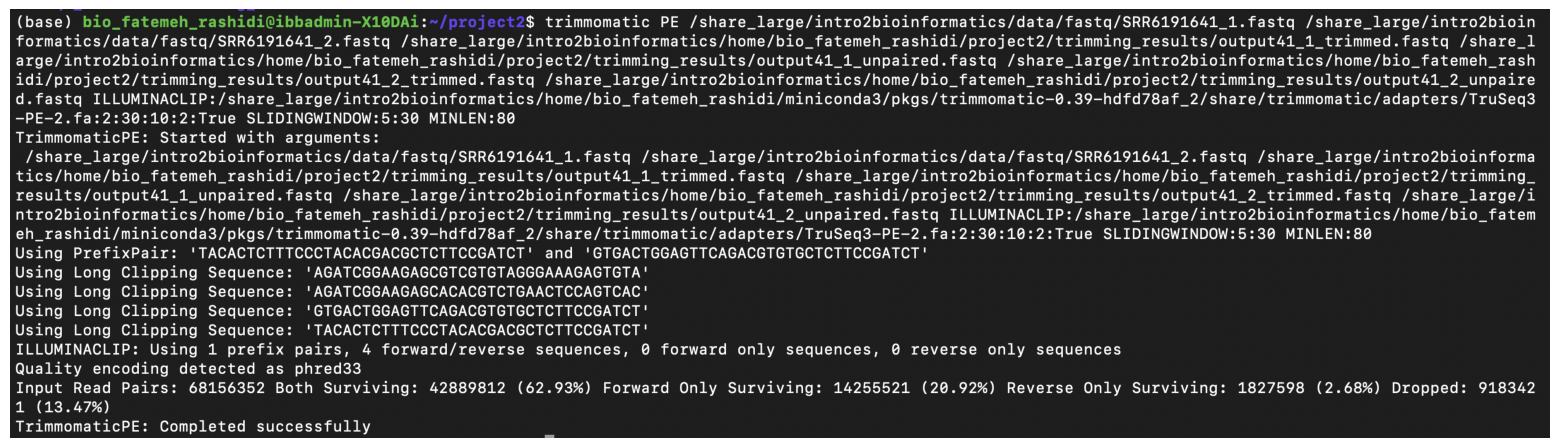

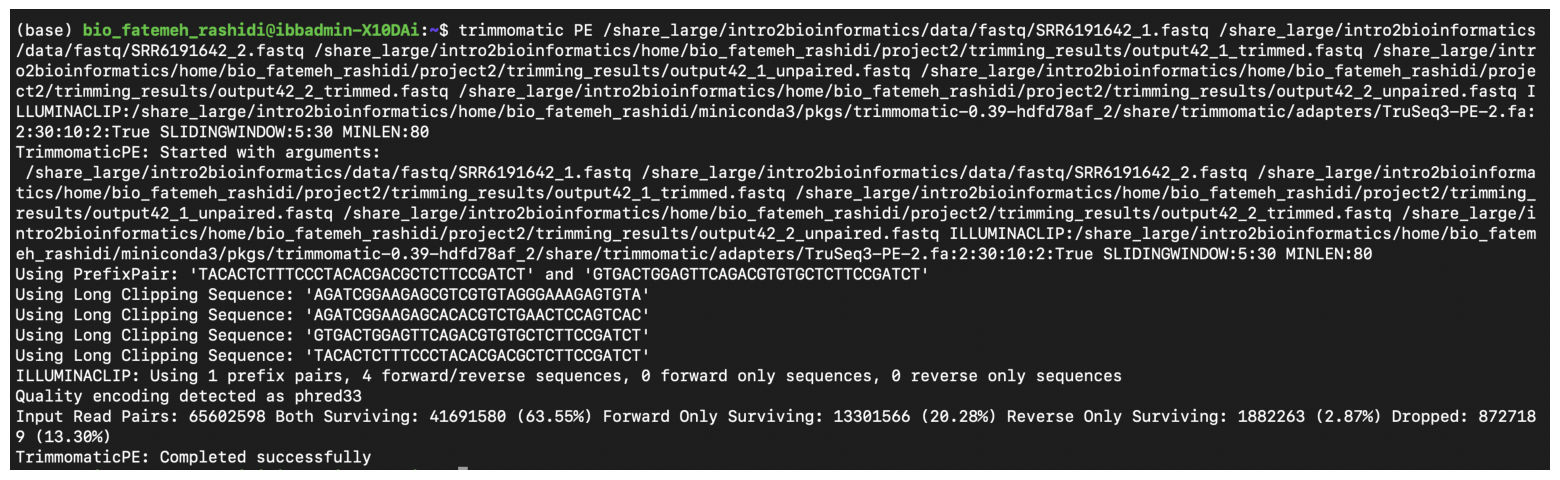

In [10]:
trimming_41 = mpimg.imread("images/trimming-41.png")
trimming_42 = mpimg.imread("images/trimming-42.png")
width = 20
plt.figure(figsize=(width, trimming_41.shape[0] / trimming_41.shape[1] * width))
plt.imshow(trimming_41)
plt.axis('off')
plt.show()
plt.figure(figsize=(width, trimming_42.shape[0] / trimming_42.shape[1] * width))
plt.imshow(trimming_42)
plt.axis('off') 
plt.show()

path to trimmed data in serever account: ```/share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results```.

### Recheck
To recheck the read qualities, we have to use FastQC again for trimmed reads using below commands:

Evaluating normal samples:

In [ ]:
! fastqc -o /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimmed_fastqc_results/ /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results/trim_41_results/output41_1_trimmed.fastq  /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results/trim_41_results/output41_2_trimmed.fastq

Evaluating tumor samples:

In [ ]:
! fastqc -o /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimmed_fastqc_results/ /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results/trim_42_results/output42_1_trimmed.fastq  /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results/trim_42_results/output42_2_trimmed.fastq

and now, copy the results in ```Project2/trimmed_fastq_results```

In [ ]:
! scp -r bio_fatemeh_rashidi@172.18.57.208:project2/trimmed_fastqc_results /Users/Fatemeh/Documents/term7/Bioinformatics/Project2

Path to fastQC results after trimmibg: ```/share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimmed_fastqc_results```

### Evaluation

#### Per base sequence quality score: Before trimming

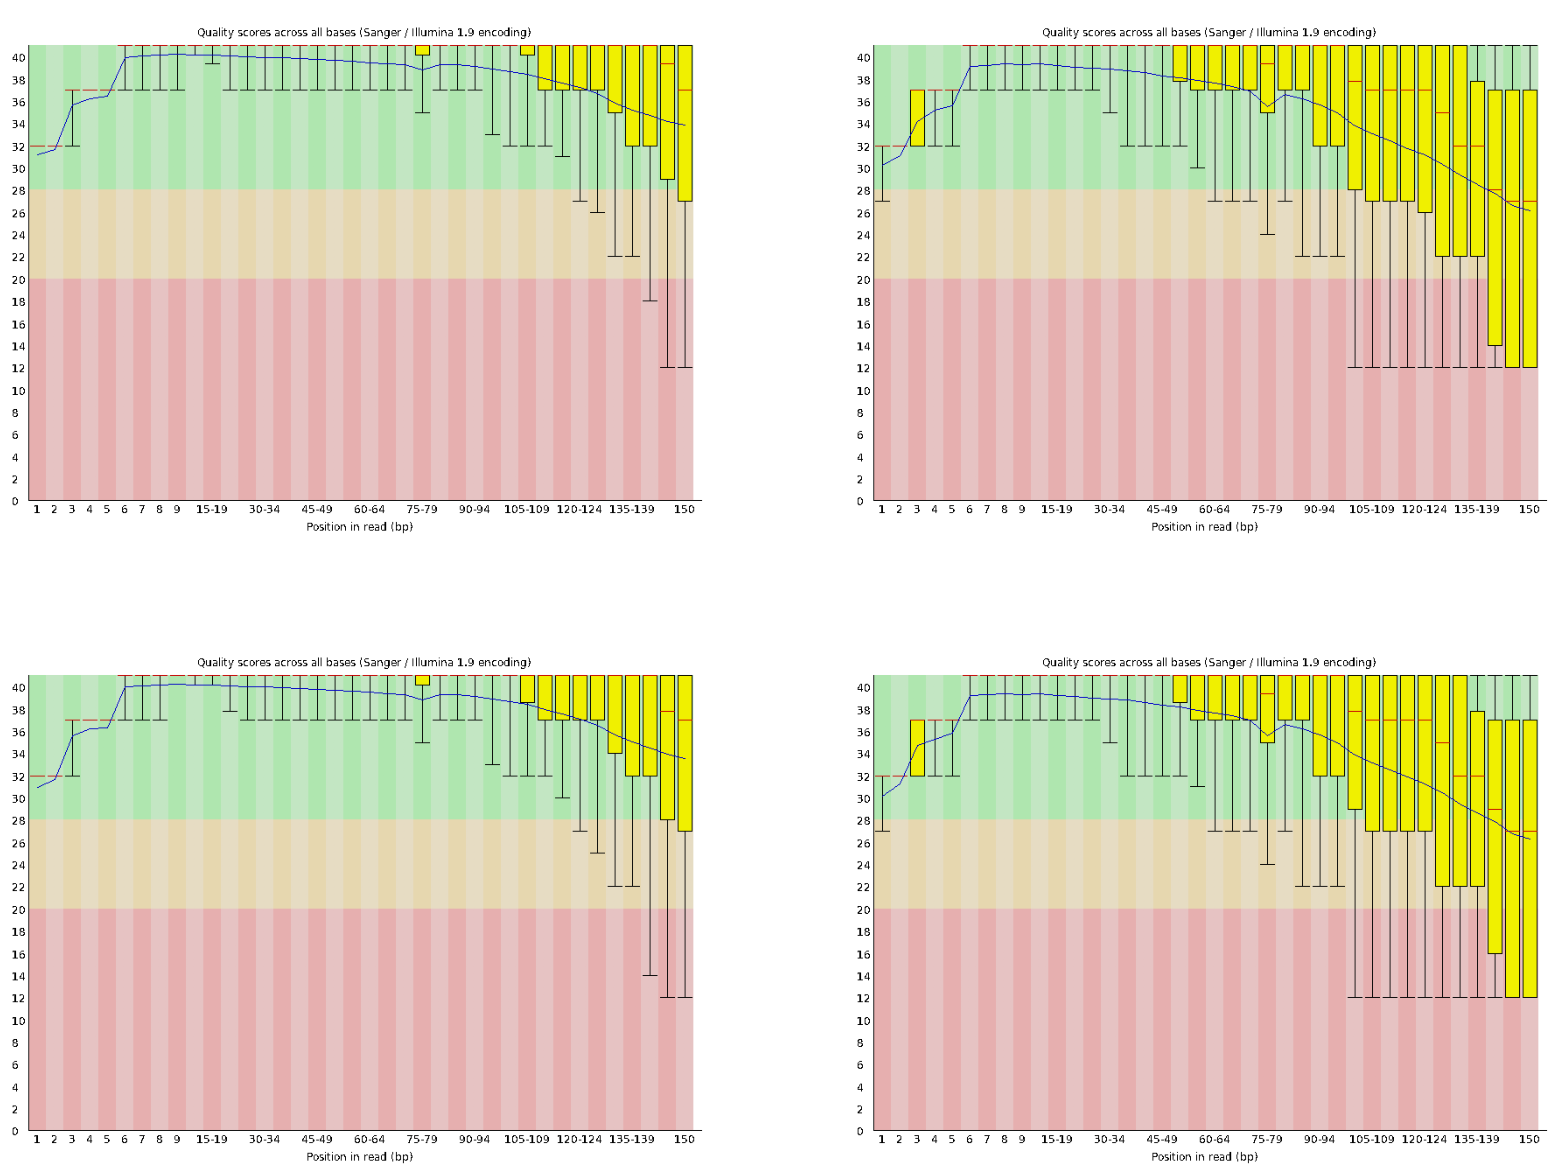

In [11]:
q_score_41_1 = mpimg.imread("QC_results/fastqc_results/SRR6191641_1_fastqc/Images/per_base_quality.png")
q_score_41_2 = mpimg.imread("QC_results/fastqc_results/SRR6191641_2_fastqc/Images/per_base_quality.png")
q_score_42_1 = mpimg.imread("QC_results/fastqc_results/SRR6191642_1_fastqc/Images/per_base_quality.png")
q_score_42_2 = mpimg.imread("QC_results/fastqc_results/SRR6191642_2_fastqc/Images/per_base_quality.png")

fig = plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.imshow(q_score_41_1)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(q_score_41_2)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(q_score_42_1)
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(q_score_42_2)
plt.axis('off')
plt.show()

#### Per base sequence quality score: After trimming

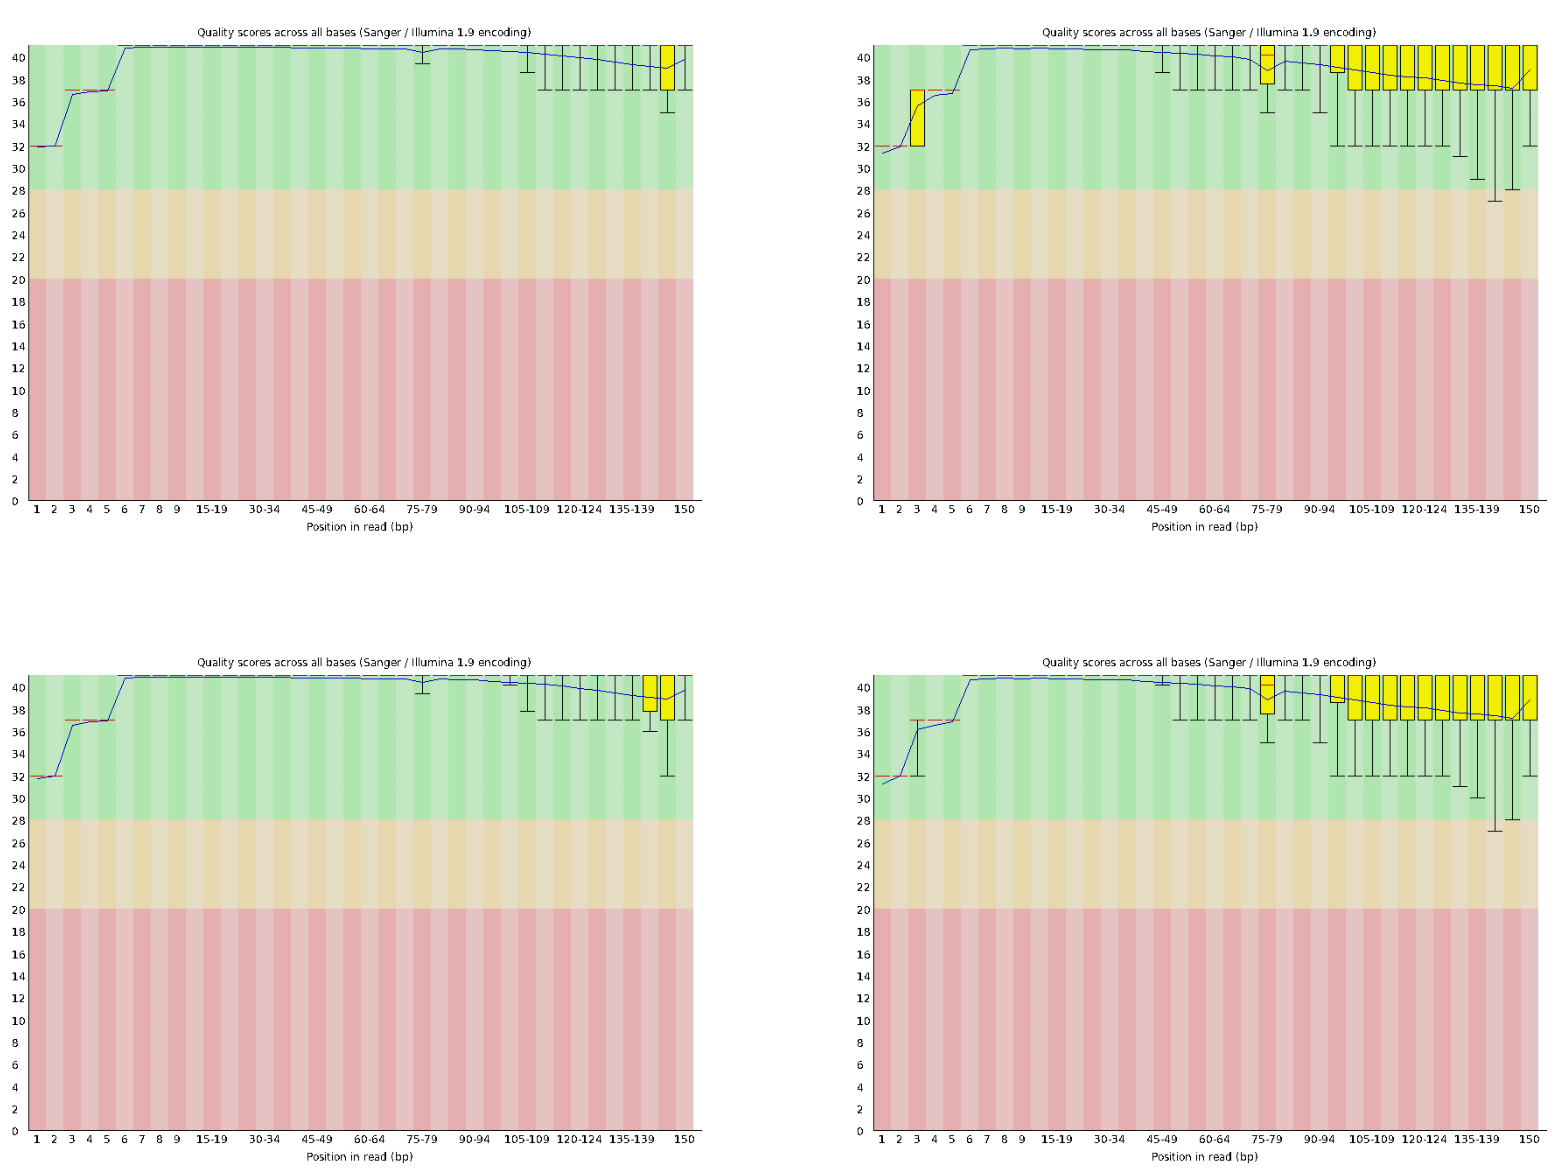

In [12]:
q_score_41_1 = mpimg.imread("QC_results/trimmed_fastqc_results/output41_1_trimmed_fastqc/Images/per_base_quality.png")
q_score_41_2 = mpimg.imread("QC_results/trimmed_fastqc_results/output41_2_trimmed_fastqc/Images/per_base_quality.png")
q_score_42_1 = mpimg.imread("QC_results/trimmed_fastqc_results/output42_1_trimmed_fastqc/Images/per_base_quality.png")
q_score_42_2 = mpimg.imread("QC_results/trimmed_fastqc_results/output42_2_trimmed_fastqc/Images/per_base_quality.png")

fig = plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.imshow(q_score_41_1)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(q_score_41_2)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(q_score_42_1)
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(q_score_42_2)
plt.axis('off')
plt.show()

Before trimming, the range of quality scores, especially in the last bases, is wider, and some of them are in orange or red areas, indicating lower quality scores. However, after trimming, most of the bases are in the green area, including the last ones. This indicates that trimming improves the quality of sequencing, and we will get better results.

Let's consider the third plot in both above images as an example. It corresponds to the forward reads of SRR6191642. As you can see, in the first plot, the last bases split into two groups: one ends in the orange area, and the second group ends in the red area. However, after trimming and reassessing, we can observe in the second plot corresponding to these transcripts, that all of the bases are in the green area, indicating good quality scores.

Also, for other transcripts intrerpretation is the same.

<hr>

#### Per sequence quality scores: Before trimming

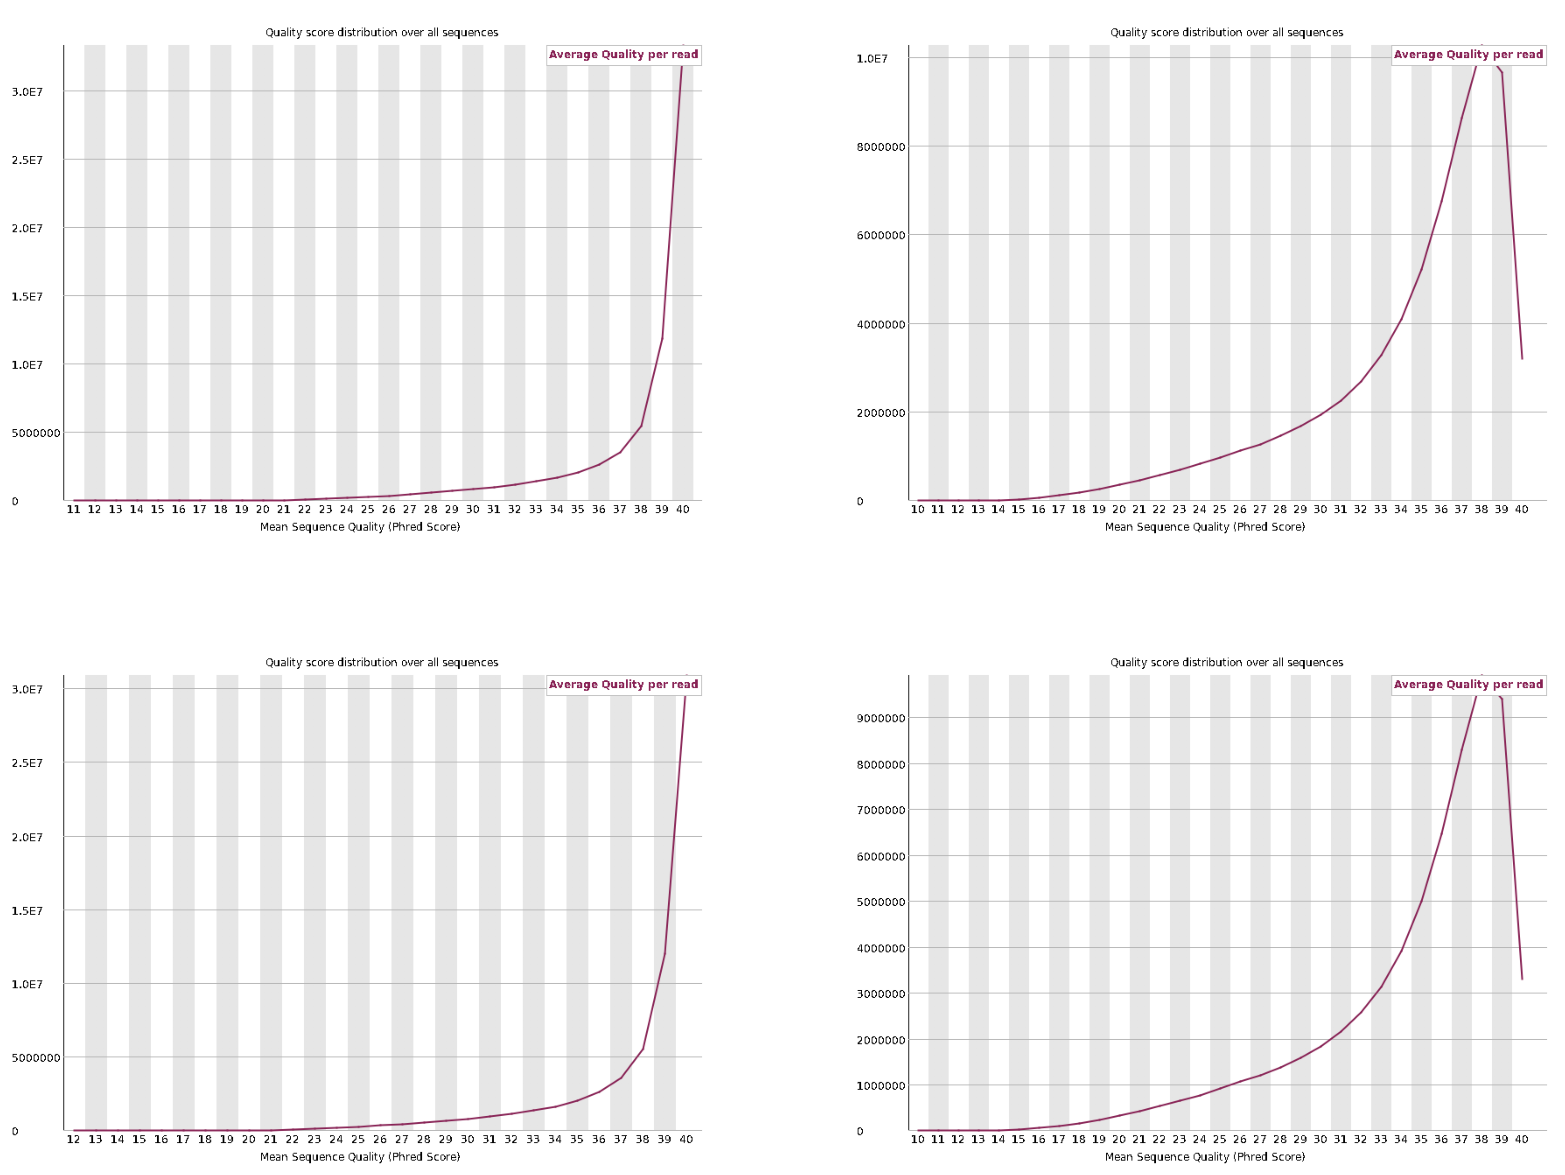

In [15]:
q_score_41_1 = mpimg.imread("QC_results/fastqc_results/SRR6191641_1_fastqc/Images/per_sequence_quality.png")
q_score_41_2 = mpimg.imread("QC_results/fastqc_results/SRR6191641_2_fastqc/Images/per_sequence_quality.png")
q_score_42_1 = mpimg.imread("QC_results/fastqc_results/SRR6191642_1_fastqc/Images/per_sequence_quality.png")
q_score_42_2 = mpimg.imread("QC_results/fastqc_results/SRR6191642_2_fastqc/Images/per_sequence_quality.png")
fig = plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.imshow(q_score_41_1)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(q_score_41_2)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(q_score_42_1)
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(q_score_42_2)
plt.axis('off')
plt.show()

Based on the above plots, the minimum Phred score for reads is somewhere between 15 and 22. This indicates that there are some reads with low-quality scores (orange/red end bars in the per-base sequence quality score plots).

Also, we observe a peak in all plots, which is good news. However, since there are a lot of reads with low scores, it's essential to perform trimming to obtain better results.

#### Per sequence quality scores: After trimming

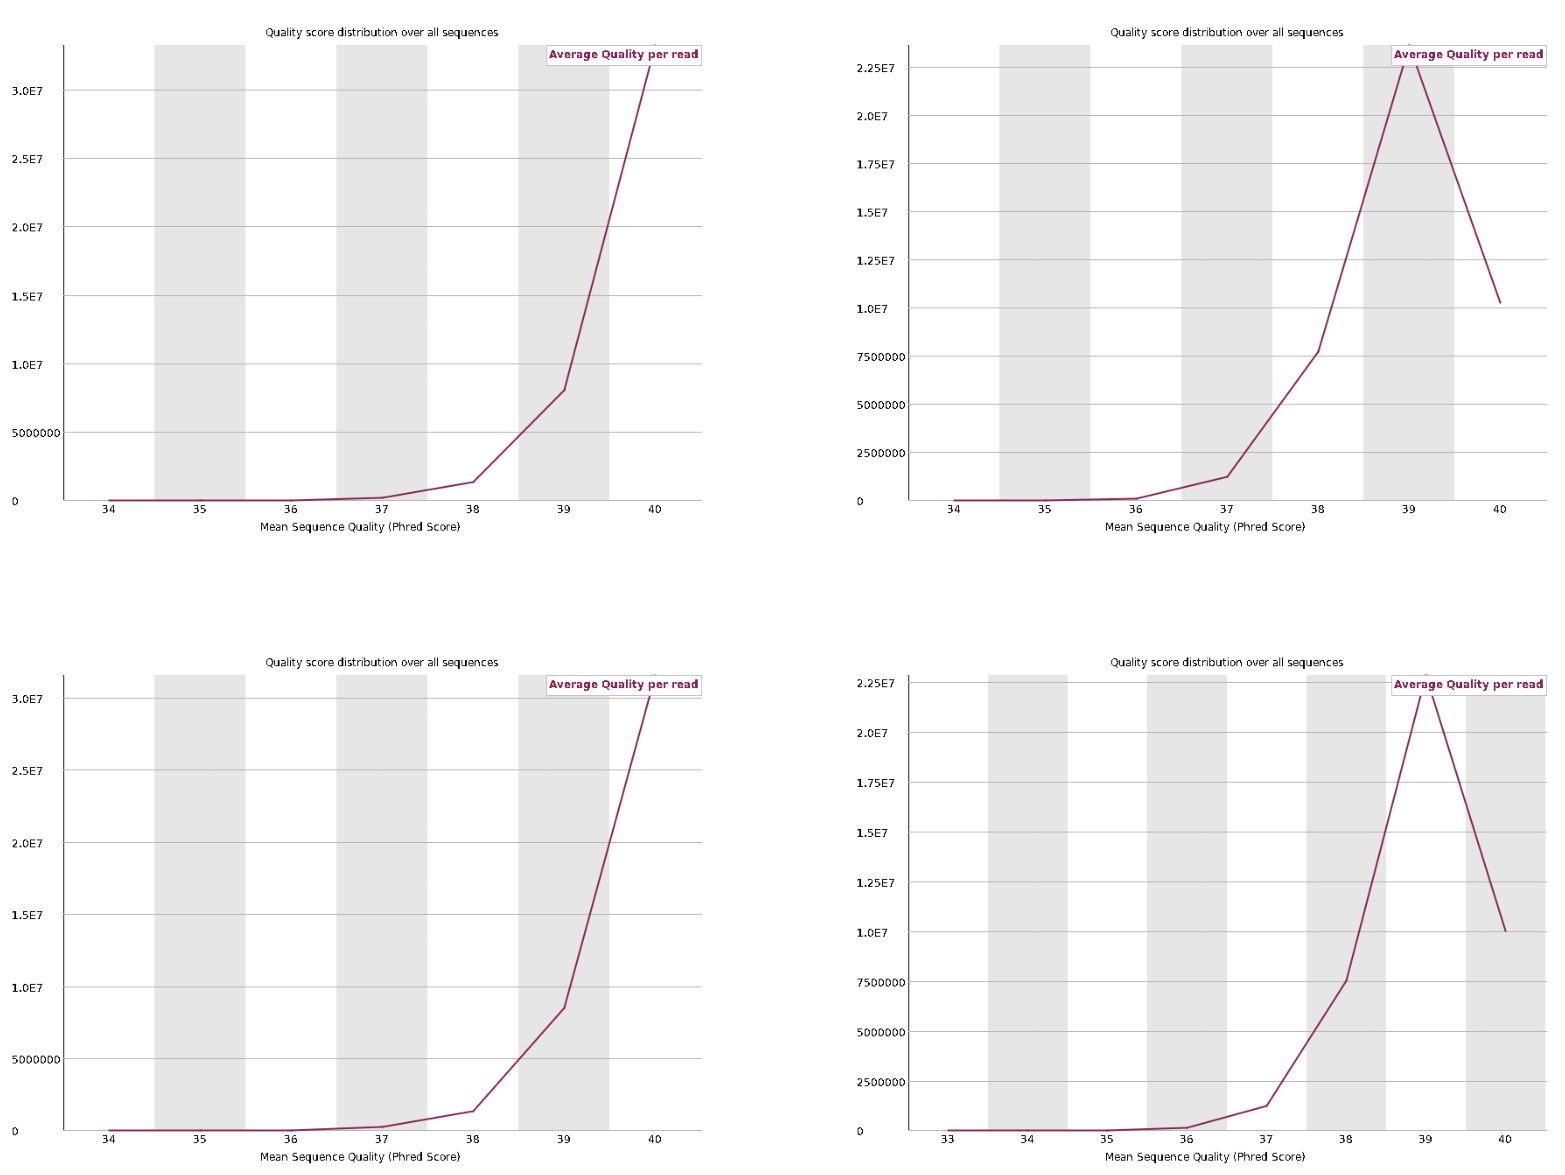

In [16]:
q_score_41_1 = mpimg.imread("QC_results/trimmed_fastqc_results/output41_1_trimmed_fastqc/Images/per_sequence_quality.png")
q_score_41_2 = mpimg.imread("QC_results/trimmed_fastqc_results/output41_2_trimmed_fastqc/Images/per_sequence_quality.png")
q_score_42_1 = mpimg.imread("QC_results/trimmed_fastqc_results/output42_1_trimmed_fastqc/Images/per_sequence_quality.png")
q_score_42_2 = mpimg.imread("QC_results/trimmed_fastqc_results/output42_2_trimmed_fastqc/Images/per_sequence_quality.png")

fig = plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.imshow(q_score_41_1)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(q_score_41_2)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(q_score_42_1)
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(q_score_42_2)
plt.axis('off')
plt.show()

In the above plots drawn after trimming, we can observe that the minimum Phred score is around 35 and 36. This means that generally, reads now have better scores, with almost all of them falling within the green area in the per-base sequence quality score. Additionally, peaks occur at scores 39 and 40, which is good enough and indicates that most reads have nearly the best scores.

Thus, trimming leads to an improvement in quality scores for our samples, and as expected, we will obtain better results if we work with trimmed data instead of raw data.

<hr>

#### Per base sequence content: Before trimming

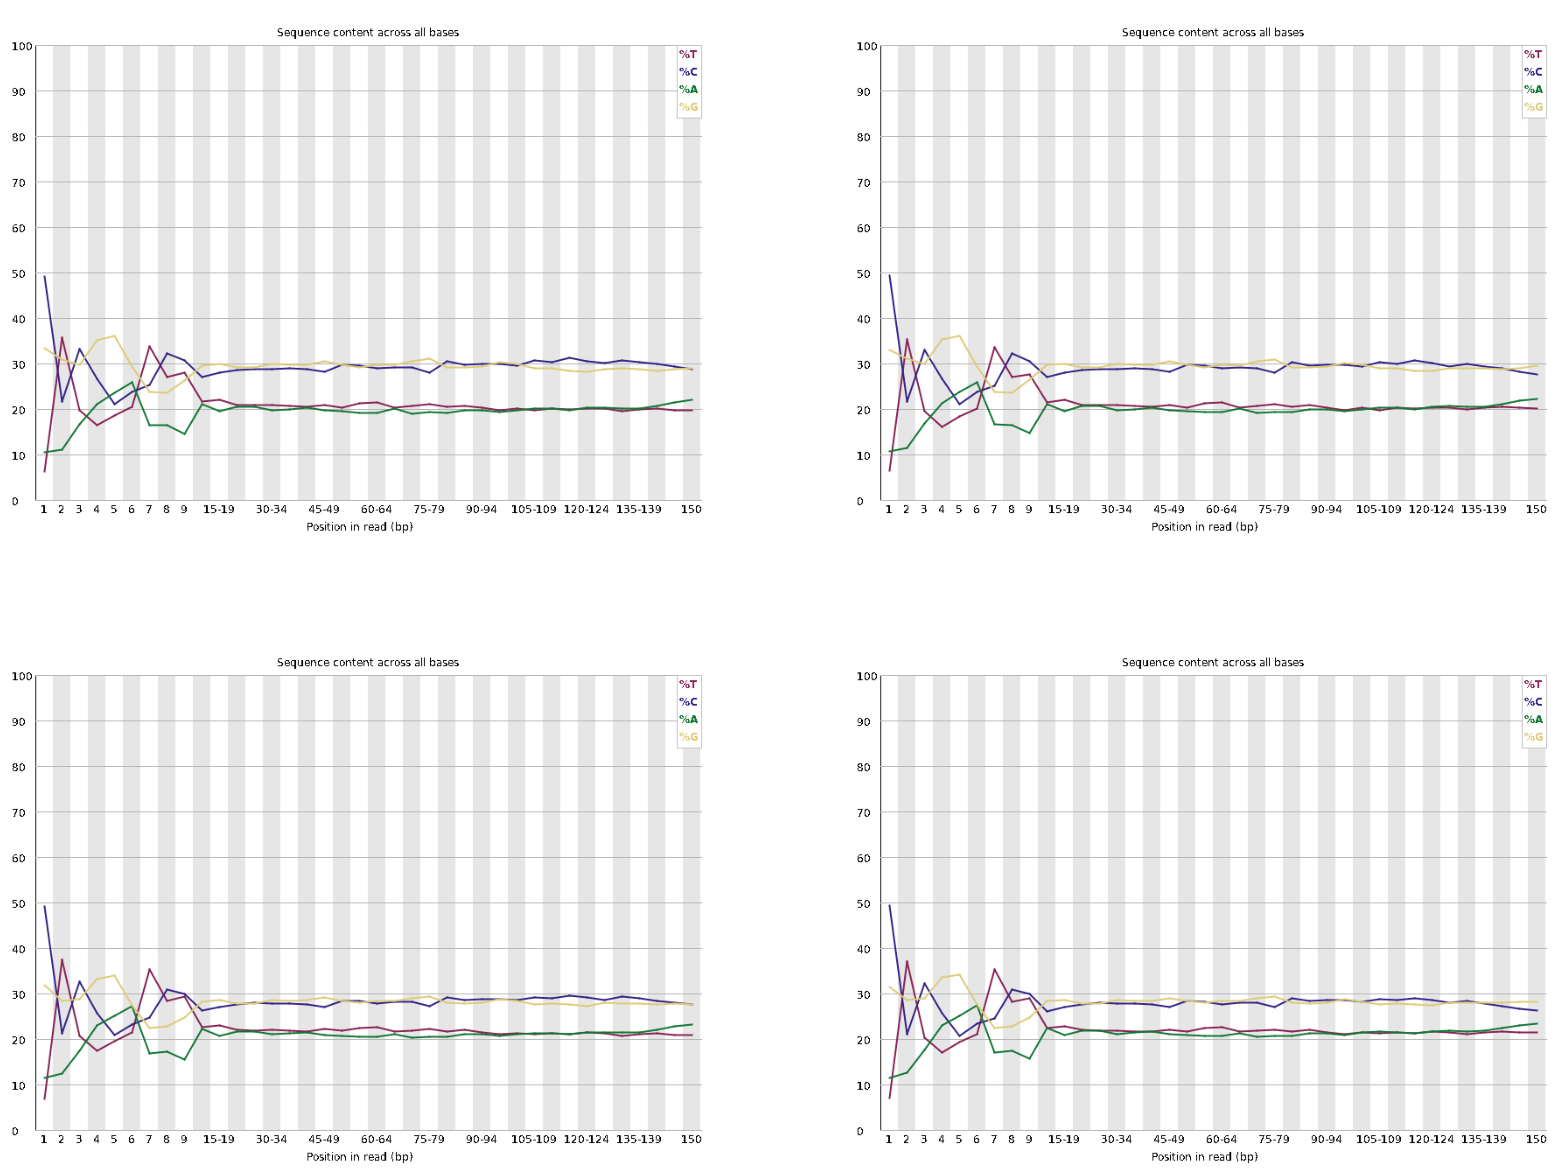

In [17]:
q_score_41_1 = mpimg.imread("QC_results/fastqc_results/SRR6191641_1_fastqc/Images/per_base_sequence_content.png")
q_score_41_2 = mpimg.imread("QC_results/fastqc_results/SRR6191641_2_fastqc/Images/per_base_sequence_content.png")
q_score_42_1 = mpimg.imread("QC_results/fastqc_results/SRR6191642_1_fastqc/Images/per_base_sequence_content.png")
q_score_42_2 = mpimg.imread("QC_results/fastqc_results/SRR6191642_2_fastqc/Images/per_base_sequence_content.png")
fig = plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.imshow(q_score_41_1)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(q_score_41_2)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(q_score_42_1)
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(q_score_42_2)
plt.axis('off')
plt.show()

<hr>

#### Per base sequence content: After trimming

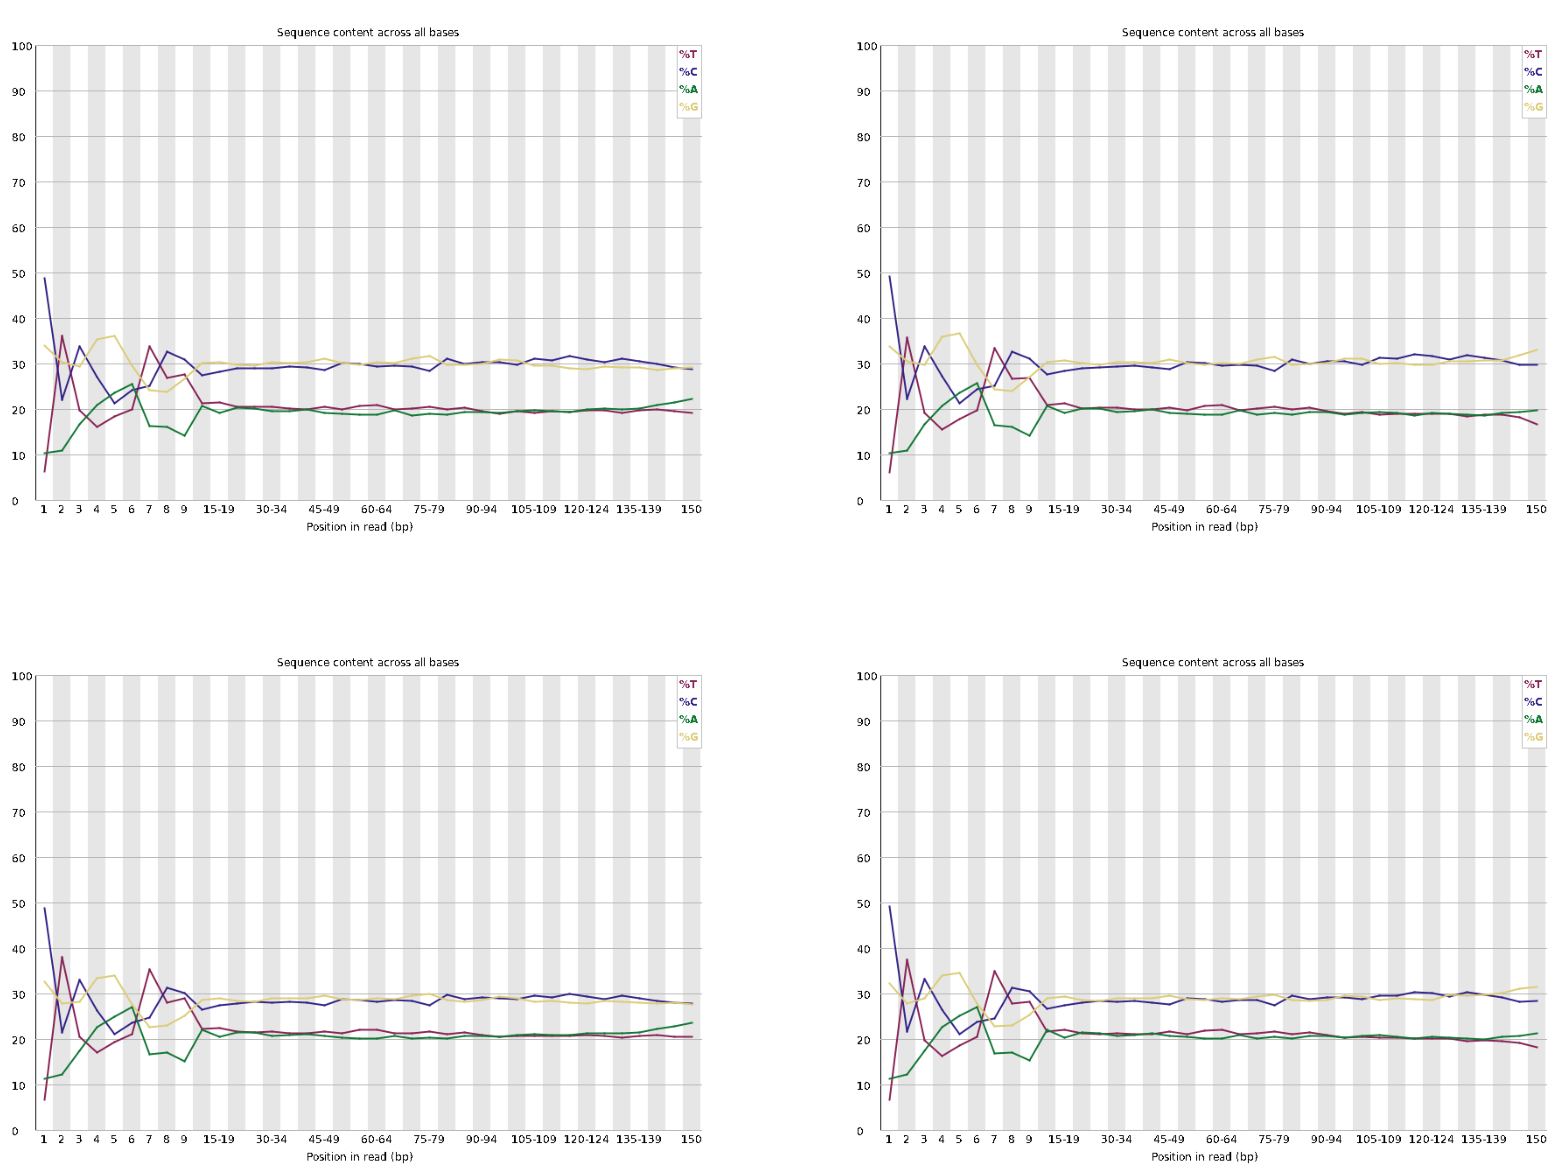

In [20]:
q_score_41_1 = mpimg.imread("QC_results/trimmed_fastqc_results/output41_1_trimmed_fastqc/Images/per_base_sequence_content.png")
q_score_41_2 = mpimg.imread("QC_results/trimmed_fastqc_results/output41_2_trimmed_fastqc/Images/per_base_sequence_content.png")
q_score_42_1 = mpimg.imread("QC_results/trimmed_fastqc_results/output42_1_trimmed_fastqc/Images/per_base_sequence_content.png")
q_score_42_2 = mpimg.imread("QC_results/trimmed_fastqc_results/output42_2_trimmed_fastqc/Images/per_base_sequence_content.png")

fig = plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.imshow(q_score_41_1)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(q_score_41_2)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(q_score_42_1)
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(q_score_42_2)
plt.axis('off')
plt.show()

All of the above diagrams plot the proportion of each base position over all of the reads in each sample. Typically, we expect to see each base roughly 25% of the time at each position, but this often fails at the beginning or end of the read due to quality or adapter content. In all the above plots, we have uniformity in bases 1 to 12-13. However, after that, the lines are nearly flat, indicating that from base 12-13 to 150, the distribution of nucleotides remains consistent and is something between 20 and 30 percent.

In simpler terms, looking at all 8 plots, they all look similar. This means that the order of the letters (A, T, C, G) in the DNA sequences stays pretty much the same throughout. It seems like when we trimmed the sequences, it didn't change which letters were where, but it did make the quality of the data better. This is good because it shows that trimming didn't mess up the data or make mistakes.

<hr>

#### 1. What is the average number of reads across samples before and after the read trimming?

##### Before trimming:
In SRR6191641 total number of sequences is	68156352 and in SRR6191642 total numer of sequences is 65602598. Which means that the average number of reads is: (68156352 + 65602598)/2 = 66879475, somthing around 67M.

##### After trimming:
In SRR6191641 total number of sequences is	42974775 and in SRR6191642 total numer of sequences is 41760432. Which means that the average number of reads is: (41760432 + 42974775)/2 = 42367603.5, somthing around 42M.

Obviously, number of reads is decreads and that is because trimming removes low-quality reads and adapter sequences. This diffrence is somthing on order 25M which means that in trimming procedure, neam 25M reads which ha poor quality, were removed.
<hr>

#### 2. Compare the read length averages in different samples before and after the read trimming?



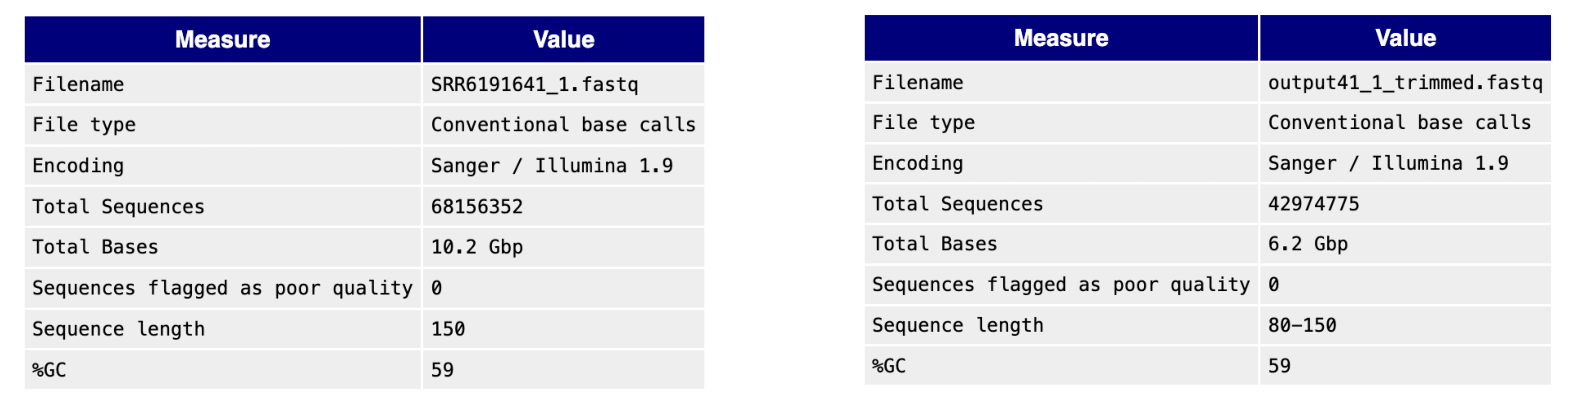

In [25]:
q_statistics_41_1 = mpimg.imread("images/statistics41_1.png")
q_statistics_41_1_trimmed = mpimg.imread("images/statistics41_1_trimmed.png")

fig = plt.figure(figsize=(20, 15))
plt.subplot(2, 2, 1)
plt.imshow(q_statistics_41_1)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(q_statistics_41_1_trimmed)
plt.axis('off')

plt.show()

As the sequence length for both normal and tumor forward and reverse reads were the same before and after trimming, I chose the table of basic statistics of forward reads of the normal sample before and after trimming. As it is obvious from those tables above, before trimming, the sequence length is constant and it is 150. But after trimming, the sequence length is something in the range of 80-150. This means that some nucleotides were removed from some reads, while others were unchanged. As a result of this observation and the results of per-base sequence content plots, we can conclude that although some nucleotides are removed from reads in trimmed data, the distribution of them did not change, which makes trimming ideal.
<hr>

#### 3. Compare the read quality distributions over all sequences before and after the read trimming.

Before trimming, especially in the last bases, the bars are larger, indicating poorer quality because some of the bars extend into the orange or red areas, indicating low quality. However, after trimming, the bars are smaller and most of them are in the green area, indicating a significant increase in read quality. This improvement is due to the removal of poor-quality reads using Trimmomatic. In fact, the quality score of reads has increased. Thus, we will obtain better results if we use trimmed data instead of raw data. (More details were provided in the "Per base sequence quality score" section above.)
<hr>

#### 4. What does the Adaptor Content warning indicate?

##### Adapter content: Befor trimming

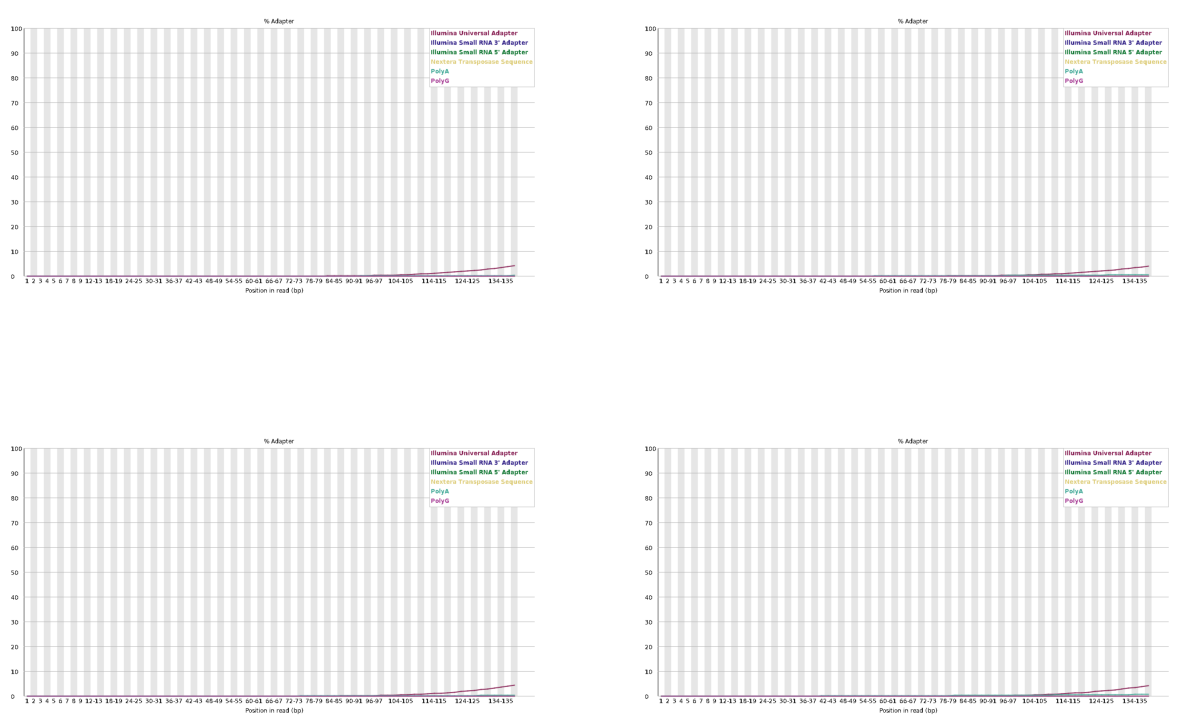

In [21]:
q_score_41_1 = mpimg.imread("QC_results/fastqc_results/SRR6191641_1_fastqc/Images/adapter_content.png")
q_score_41_2 = mpimg.imread("QC_results/fastqc_results/SRR6191641_2_fastqc/Images/adapter_content.png")
q_score_42_1 = mpimg.imread("QC_results/fastqc_results/SRR6191642_1_fastqc/Images/adapter_content.png")
q_score_42_2 = mpimg.imread("QC_results/fastqc_results/SRR6191642_2_fastqc/Images/adapter_content.png")
fig = plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(q_score_41_1)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(q_score_41_2)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(q_score_42_1)
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(q_score_42_2)
plt.axis('off')
plt.show()

##### Adapter content: After trimming

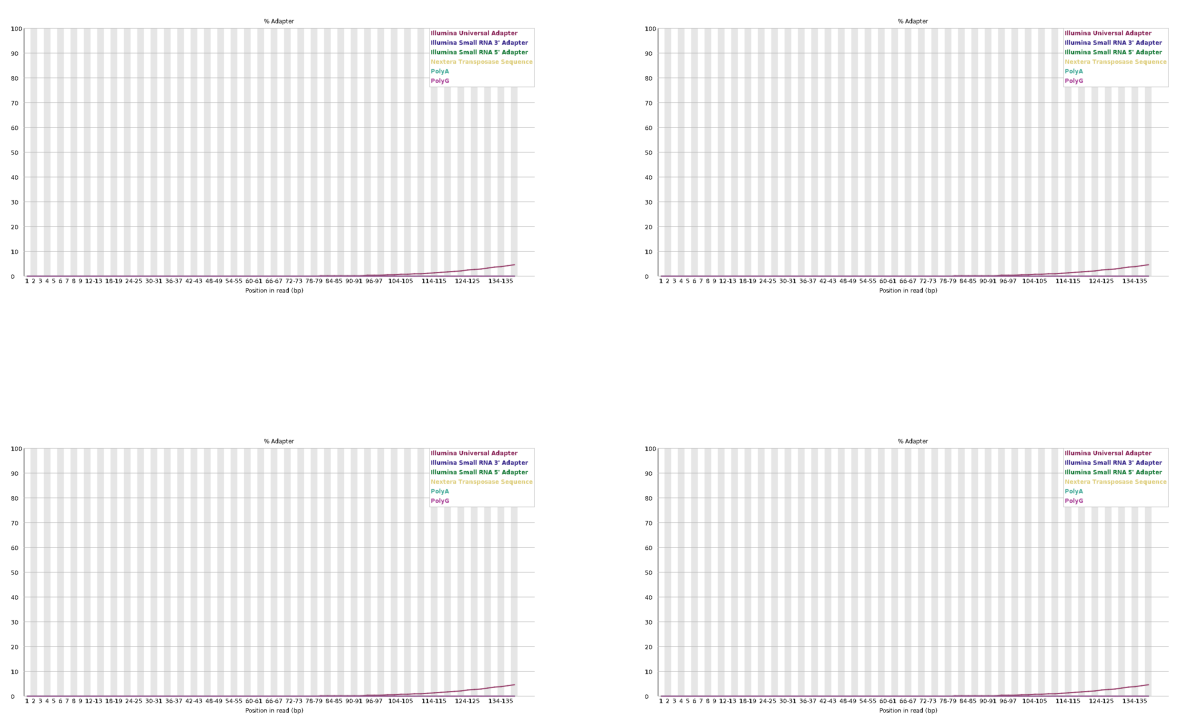

In [22]:
q_score_41_1 = mpimg.imread("QC_results/trimmed_fastqc_results/output41_1_trimmed_fastqc/Images/adapter_content.png")
q_score_41_2 = mpimg.imread("QC_results/trimmed_fastqc_results/output41_1_trimmed_fastqc/Images/adapter_content.png")
q_score_42_1 = mpimg.imread("QC_results/trimmed_fastqc_results/output41_1_trimmed_fastqc/Images/adapter_content.png")
q_score_42_2 = mpimg.imread("QC_results/trimmed_fastqc_results/output41_1_trimmed_fastqc/Images/adapter_content.png")
fig = plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.imshow(q_score_41_1)
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(q_score_41_2)
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(q_score_42_1)
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(q_score_42_2)
plt.axis('off')
plt.show()

The "Adapter Content" provides information about the presence and abundance of adapter sequences in our sequencing data. Adapter sequences are short DNA sequences used in library preparation that should ideally be removed before downstream analysis. If an adapter sequence is present in more than 5% of all reads, a ```warning``` is issued. However, in our case, in all four reports before and after trimming, the Adapter content is acceptable, as indicated by tangent lines reaching 0 (with maximum values at the end of the lines also less than 5%).
<hr>

#### 5. Why do we first remove the Adapter sequences for the reads and then the low-quality bases?

<b>Adapter Sequences</b>: Adapter sequences are known sequences that are ligated to the ends of DNA fragments during library preparation. 

By the above defenition, we first remove adapter sequences from reads because they are extra bits of DNA added during the library preparation process. These adapters aren't part of the original biological material and can cause problems in our analysis if we don't get rid of them. So, by removing them, we make sure we're focusing on the real biological sequences we're interested in.

After removing adapters, we also trim off low-quality bases. These are parts of the sequence where the quality of the data isn't very good. Trimming them helps to make sure our analysis is more accurate because we're only working with the high-quality parts of the sequence.

So, we remove adapter sequences first to clean up our data and then trim off low-quality bases to make sure our analysis is as accurate as possible.
<hr>

#### 6. What does the quality of bases mean, and how is it obtained?

The quality of bases tells us how certain we are about the accuracy of each letter (A, T, C, or G) in a DNA sequence. It's like a confidence score for each letter. This quality is measured using a number called a Phred score, which is calculated based on the signals we get during DNA sequencing. A higher Phred score means we're more confident that the letter is correct, while a lower score means there's more uncertainty.
<hr>

## Part b - Read mapping

To do this section, we have to install hisat2 in the first step using the below command in an environment:

In [ ]:
! conda create -n hisat2_env
! conda activate hisat2_env
! conda install -c bioconda hisat2
! hisat2 --version

Now, we use ```hisat2``` for aligning the transcripts to the reference genome using below commands for both normal and tumor samples:

Normal sample:

In [23]:
!hisat2 -p 10 -x ./reference_index/reference_indexing \
-1 /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results/trim_41_results/output41_1_trimmed.fastq \
-2 /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results/trim_41_results/output41_2_trimmed.fastq \
-S ./hisat/hisat_alignment_trimmed/aligned41.sam

zsh:1: command not found: hisat2


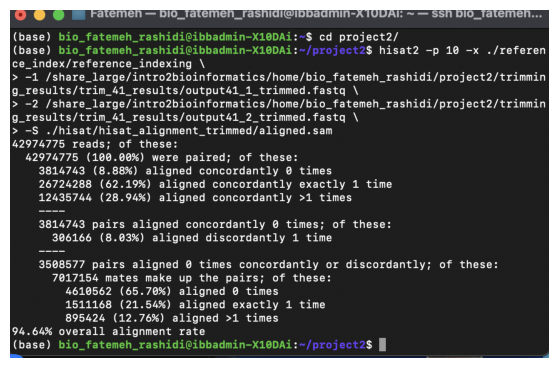

In [24]:
hisat_41 = mpimg.imread("images/hisat_41.png")
width = 7
plt.figure(figsize=(width, hisat_41.shape[0] / hisat_41.shape[1] * width))
plt.imshow(hisat_41)
plt.axis('off')
plt.show()

this result indicates that:
Total Reads: 42,974,775 reads were processed

Paired Reads: All reads were paired-end reads (meaning each DNA fragment was sequenced from both ends)

Concordant Alignments: Among the paired reads, 38,147,43 pairs (8.88%) didn't align together, 26,724,288 pairs (62.19%) aligned together once, and 12,435,744 pairs (28.94%) aligned together more than once.

Discordant Alignments: Of the pairs that didn't align together, 306,166 pairs (8.03%) had one end aligning to one part of the genome and the other end aligning to another part (discordant alignment).

Overall Alignment: In total, <b>94.64%</b>of the reads were successfully aligned to the reference genome.

Tumor sample:

In [ ]:
! hisat2 -p 10 -x ./reference_index/reference_indexing \
-1 /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results/trim_42_results/output42_1_trimmed.fastq \
-2 /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results/trim_42_results/output42_2_trimmed.fastq \
-S ./hisat/hisat_alignment_trimmed/aligned.sam

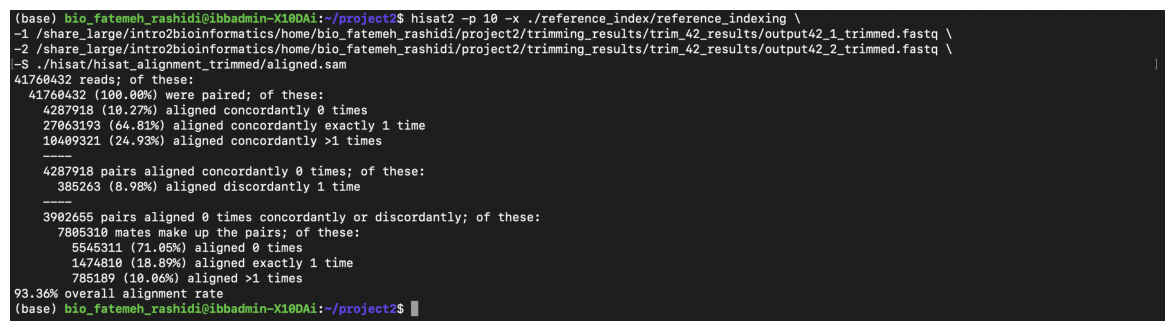

In [25]:
hisat_42 = mpimg.imread("images/hisat_42.png")
width = 15
plt.figure(figsize=(width, hisat_42.shape[0] / hisat_42.shape[1] * width))
plt.imshow(hisat_42)
plt.axis('off')
plt.show()

this result indicates that:
Total Reads: 41,760,432 reads were processed

Paired Reads: All reads were paired-end reads (meaning each DNA fragment was sequenced from both ends)

Concordant Alignments: Among the paired reads, 4,287,918 pairs (10.27%) didn't align together, 27,063,193 pairs (64.81%) aligned together once, and 10,409,321 pairs (24.93%) aligned together more than once.

Discordant Alignments: Of the pairs that didn't align together, 385,263 pairs (8.98%) had one end aligning to one part of the genome and the other end aligning to another part (discordant alignment).

Overall Alignment: In total, <b>93.36%</b>of the reads were successfully aligned to the reference genome.

Now, for working on ```sam``` files we have to install ```samtools``` using below command:

In [ ]:
! conda install anaconda::samtools

Run samtools command:

In [ ]:
! samtools view -bS aligned.sam > aligned.bam

But when I ran the above command, I got the following error: 

samtools: error while loading shared libraries: libcrypto.so.1.0.0: cannot open shared object file: No such file or directory.

After lots of attempts, I was able to fix this issue by installing Samtools in a new environment using the following commands:

In [ ]:
! conda install -c bioconda samtools=1.9 --force-reinstall

Now, use this tools and convert sam files to bam files:

In [ ]:
# for tumor samples
! samtools view -bS aligned.sam > aligned2.bam

# for normal samples
!samtools view -bS aligned41.sam > aligned2.bam

In the next step, we have to sort ```bam``` files using below commands:

In [ ]:
# for tumor samples
! samtools sort ./aligned2.bam -o ./sorted_bams/sorted_bam_2.bam

# for normal samples
!samtools sort -@ 6 ./aligned1.bam -o ./sorted_bams/sorted_bam_1.bam # use 6 threads to do it faster

Next step is indexing the ```bam``` files like below:

In [ ]:
! samtools index ./sorted_bams/sorted_bam_2.bam
! samtools index ./sorted_bams/sorted_bam_1.bam

Unzip refernce genome:

In [ ]:
! gunzip -c /share_large/intro2bioinformatics/data/Homo_sapiens.GRCh38.dna.toplevel.fa.gz > /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/reference_index/reference_genome.fa

Index the reference genome using the below command:

In [ ]:
! hisat2-build /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/reference_index/reference_genome.fa /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/reference_indexing

Extract mapping statistics using ```flagstat```:

In [ ]:
! samtools flagstat /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/hisat/hisat_alignment_trimmed/sorted_bams/sorted_bam_1.bam > ./mapping_stats/mapping_stats_41.txt

In [ ]:
! samtools flagstat /share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/hisat/hisat_alignment_trimmed/sorted_bams/sorted_bam_2.bam > ./mapping_stats/mapping_stats_42.txt

### Evaluation

#### 1. What is the difference between SAM and BAM files?

<b>Sam file</b>: SAM (Sequence Alignment Map) is a text-based format originally for storing biological sequences aligned to a reference sequence.


SAM (Sequence Alignment Map) files are like regular text documents where each line has information about the alignment of DNA or RNA sequences. They're easy for humans to read but can take up a lot of space and are slower to work with.

BAM files, on the other hand, are like compressed versions of SAM files. They're smaller and faster to use because they're in a special computer-readable format. Even though humans can't read them easily, computers can understand and work with them much more quickly.
<hr>

#### 2. What is the purpose of indexing the genome?

Indexing the genome is like creating a map(index) for a book. Just like how a book's index helps you quickly find specific topics or pages, genome indexing creates a roadmap for finding specific parts of the genome. This roadmap helps bioinformatics tools quickly locate genes, regions, or sequences within the genome without having to search through the entire genome each time. It's like having bookmarks in a book, making tasks such as finding genes or identifying variations much faster and easier. In fact, genes are like keys, and indeices like values corredsponding to a gene in a python ditionary!
<hr>

#### 3. Report mapping percentages of all samples in a table. Please explain why a low percentage of reads cannot be mapped.

In [50]:
flagstat_file = 'mapping_stats/mapping_stats_41.txt'

total_reads = 0
mapped_reads = 0
mapping_percentage = 0.0

with open(flagstat_file, 'r') as file:
    for line in file:
        if 'in total' in line:
            total_reads = int(line.split()[0])
        elif 'mapped' in line:
            mapped_reads = int(line.split()[0])
            mapping_percentage = float(line.split('(')[1].split('%')[0])
            break 

print("Total Reads:", total_reads)
print("Mapped Reads:", mapped_reads)
print("Mapping Percentage:", mapping_percentage)

print("\nMapping Statistics Table:")
print("| Sample | Total Reads | Mapped Reads | Mapping Percentage |")
print("|--------|-------------|--------------|--------------------|")
print("| Normal | {:,} | {:,}  | {:.2f}%             |".format(total_reads, mapped_reads, mapping_percentage))

Total Reads: 163217037
Mapped Reads: 158606475
Mapping Percentage: 97.18

Mapping Statistics Table:
| Sample | Total Reads | Mapped Reads | Mapping Percentage |
|--------|-------------|--------------|--------------------|
| Normal | 163,217,037 | 158,606,475  | 97.18%             |


In [51]:
flagstat_file = 'mapping_stats/mapping_stats_42.txt'

total_reads = 0
mapped_reads = 0
mapping_percentage = 0.0

with open(flagstat_file, 'r') as file:
    for line in file:
        if 'in total' in line:
            total_reads = int(line.split()[0])
        elif 'mapped' in line:
            mapped_reads = int(line.split()[0])
            mapping_percentage = float(line.split('(')[1].split('%')[0])
            break

print("Total Reads:", total_reads)
print("Mapped Reads:", mapped_reads)
print("Mapping Percentage:", mapping_percentage)

print("\nMapping Statistics Table:")
print("| Sample | Total Reads | Mapped Reads | Mapping Percentage |")
print("|--------|-------------|--------------|--------------------|")
print("| Tumor  | {:,} | {:,}  | {:.2f}%             |".format(total_reads, mapped_reads, mapping_percentage))

Total Reads: 144637034
Mapped Reads: 139091723
Mapping Percentage: 96.17

Mapping Statistics Table:
| Sample | Total Reads | Mapped Reads | Mapping Percentage |
|--------|-------------|--------------|--------------------|
| Tumor  | 144,637,034 | 139,091,723  | 96.17%             |


As it is shown inthe above tables, for the normal samples 97.18% of reads are aligned to the reference genome and in tumor samples 96.17% of reads aligned to the reference genome successfully.

These percentages are a bit different with ones terminal gave us usig ```hisat2``` and this may be because of one of the below reasons:
<ul>
    <li>Counting criteria: HISAT2 may use different criteria for counting aligned reads compared to SAMtools flagstat. For example, HISAT2 may only count reads that align concordantly (both ends aligning properly) towards the overall alignment rate, while SAMtools flagstat may include all types of alignments (concordant, discordant, supplementary, etc.).</li>
    <li>Different alignment algorithms: HISAT2 and SAMtools use different alignment algorithms and parameters, which can lead to variations in alignment results. HISAT2 may be more sensitive or specific in its alignment approach, leading to differences in the number of aligned reads.</li>
    <li>Reporting format: The way alignment statistics are reported or calculated may vary between HISAT2 and SAMtools flagstat, leading to discrepancies in the overall alignment rate.
    <li>Reference genome: Differences in the reference genome used for alignment can also impact alignment rates. HISAT2 may be optimized for certain genome assemblies or may handle certain genomic regions differently, resulting in variations in alignment rates compared to SAMtools.</li>
</ul>

When only a small percentage of the reads from the data can be matched to a reference like a genome or transcriptome, it could be because of one of the following reasons:

1. **Data quality:** If the data isn't very good, with mistakes or unclear parts, it's harder to match it up.

2. **Biological differences:** Sometimes, the genetic makeup of the samples being studied is too different or complex for all the reads to match up perfectly.

3. **How the experiment was done:** The way the samples were prepared or the techniques used can affect how well the reads match up.

4. **Reference quality:** If the reference used for matching isn't complete or has errors, it can make matching harder.

5. **Technical issues:** Problems with the software or settings used to match the reads can also lead to fewer matches.
<hr>

## Part c - Building gene expression matrix

In this part, we have to install htseq befor doing anything else:


In [ ]:
! conda install -c bioconda htseq

Then, run htseq command like below for two normal and tumor samples.

In [ ]:
# Normal samples
! htseq-count --format=bam --order=pos ./project2/hisat/hisat_alignment_trimmed/sorted_bams/sorted_bam_1.bam /share_large/intro2bioinformatics/data/Homo_sapiens.GRCh38.106.chr.gtf.gz > ./project2/htseq_counts/htseq_count_41

In [ ]:
# Tumor samples
! htseq-count --format=bam --order=pos ./project2/hisat/hisat_alignment_trimmed/sorted_bams/sorted_bam_2.bam /share_large/intro2bioinformatics/data/Homo_sapiens.GRCh38.106.chr.gtf.gz > ./project2/htseq_counts/htseq_count_42

Now, copy the results to local

In [ ]:
! scp -r bio_fatemeh_rashidi@172.18.57.208:project2/htseq_counts/htseq_count_41 /Users/Fatemeh/Documents/term7/Bioinformatics/Project2

! scp -r bio_fatemeh_rashidi@172.18.57.208:project2/htseq_counts/htseq_count_42 /Users/Fatemeh/Documents/term7/Bioinformatics/Project2

As it is mentioned, we have to merge the results to use them while using edgeR. The following python code while dnerge counts for us easily.

In [1]:
import pandas as pd

SRR_41_counts = pd.read_csv('htseq_counts/htseq_count_41', sep='\t', index_col=0, header=None, names=['Gene', 'Normal'])
SRR_42_counts = pd.read_csv('htseq_counts/htseq_count_42', sep='\t', index_col=0, header=None, names=['Gene', 'Tumor'])

merged_counts = pd.concat([SRR_41_counts, SRR_42_counts], axis=1)

merged_counts.to_csv('htseq_counts/merged_counts.csv')

df = pd.read_csv('htseq_counts/merged_counts.csv')

last_five_rows = df.tail(5)
print(last_five_rows)

                         Gene    Normal     Tumor
61498            __no_feature  16855262  18221143
61499             __ambiguous   2416555   2007622
61500         __too_low_aQual   1430153   1313747
61501           __not_aligned   1529881   2065670
61502  __alignment_not_unique  12867012  10820452


<b>no_feature</b>: These are reads that could not be aligned to any feature in the annotation file. It happens when there is a read which does not overlap with any annotated gene.

<b>ambigiuous</b>: These are reads that overlap with multiple features in the annotation.

<b>too_low_aQual</b>: These are reads that have alignment qualities below a certain threshold.

<b>not_aligned</b>: These are reads that could not be aligned to the reference genome at all which happens when there is sequencing error, adapter contamination, or factors affecting read quality.

<b>alignment_not_unique</b>: These reads have multiple equally good aignment positions, making it ambiguous to assign them to a single feature.

### Evaluation

#### 1. How many genes are not expressed in control and tumor samples? Explain the results.

In [2]:

merged_counts = pd.read_csv('htseq_counts/merged_counts.csv')

not_expressed_control = (merged_counts['Normal'] == 0).sum()

not_expressed_tumor   = (merged_counts['Tumor'] == 0).sum()


print("Number of genes not expressed in control samples:", not_expressed_control)
print("Number of genes not expressed in tumor samples:", not_expressed_tumor)

Number of genes not expressed in control samples: 24632
Number of genes not expressed in tumor samples: 21232


In the control samples, there are <b>24,632</b> genes that are not expressed. In fact, this is the number of zeros in the second column(Normal column) of ```merged_counts```.

Also, there are <b>21,232</b> genes that are not expressed in the tumor samples which is the number of zeros in the third column of ```merged_counts```.
<hr>

#### 2. Compare the matrix obtained at this stage with the corresponding gene expression submatrix of the main study. Discuss the differences.


In [4]:
GSE104836_gene_exp = pd.read_table('GSE104836_gene_exp.txt')

print(GSE104836_gene_exp.columns)

Index(['gene', 'Pos', 'Strand', 'Length', 'X101C_COUNT', 'X101N_COUNT',
       'X111C_COUNT', 'X111N_COUNT', 'X112C_COUNT', 'X112N_COUNT',
       'X29C_COUNT', 'X29N_COUNT', 'X34C_COUNT', 'X34N_COUNT', 'X48C_COUNT',
       'X48N_COUNT', 'X55C_COUNT', 'X55N_COUNT', 'X57C_COUNT', 'X57N_COUNT',
       'X91C_COUNT', 'X91N_COUNT', 'X94C_COUNT', 'X94N_COUNT', 'X101C_TPM',
       'X101N_TPM', 'X111C_TPM', 'X111N_TPM', 'X112C_TPM', 'X112N_TPM',
       'X29C_TPM', 'X29N_TPM', 'X34C_TPM', 'X34N_TPM', 'X48C_TPM', 'X48N_TPM',
       'X55C_TPM', 'X55N_TPM', 'X57C_TPM', 'X57N_TPM', 'X91C_TPM', 'X91N_TPM',
       'X94C_TPM', 'X94N_TPM', 'Web'],
      dtype='object')


print all genes in merged counts

In [31]:
merged_counts[:-5]

Gene  Normal  Tumor
0      ENSG00000000003     194    322
1      ENSG00000000005       2     24
2      ENSG00000000419     282    230
3      ENSG00000000457     241    259
4      ENSG00000000460     168    117
...                ...     ...    ...
61493  ENSG00000289714       0      0
61494  ENSG00000289715       6      0
61495  ENSG00000289716       0      2
61496  ENSG00000289718       0      1
61497  ENSG00000289719       1      2

[61498 rows x 3 columns]

Make a dataframe for pair id 29 gene expression in both samples:

In [6]:
my_GSE_gene_exp = pd.read_csv('GSE104836_gene_exp.csv', usecols=['gene', 'X29C_COUNT', 'X29N_COUNT'], sep='\t')
my_GSE_gene_exp.to_csv('my_GSE_gene_exp.csv')

my_GSE_gene_exp

gene  X29C_COUNT  X29N_COUNT
0          A1BG         169          87
1      A1BG-AS1         159         126
2          A1CF          28        1378
3           A2M       41129       19374
4       A2M-AS1        2785        1359
...         ...         ...         ...
37359    ZYG11A          42          21
37360    ZYG11B        2413        2686
37361       ZYX        2182        1674
37362     ZZEF1        3481        7520
37363      ZZZ3        1791        1471

[37364 rows x 3 columns]

Construct a mapping between gene ids and gene names using ```Homo_sapiens.GRCh38.106.chr.gtf```.

In [8]:
gene_id_to_name = {}

with open('Homo_sapiens.GRCh38.106.chr.gtf', 'r') as file:
    for line in file:
        if line.startswith('#'):
            continue
    
        fields = line.strip().split('\t')

        attributes = fields[8].split(';')
        gene_id = None
        gene_name = None
        for attr in attributes:
            if attr.strip().startswith('gene_id'):
                gene_id = attr.strip().split('"')[1]
            elif attr.strip().startswith('gene_name'):
                gene_name = attr.strip().split('"')[1]
        
        if gene_id and gene_name:
            gene_id_to_name[gene_id] = gene_name

for gene_id, gene_name in gene_id_to_name.items():
    print("Gene ID", gene_id, "- Gene Name: ", gene_name)

Gene ID ENSG00000186827 - Gene Name:  TNFRSF4
Gene ID ENSG00000186891 - Gene Name:  TNFRSF18
Gene ID ENSG00000160072 - Gene Name:  ATAD3B
Gene ID ENSG00000225972 - Gene Name:  MTND1P23
Gene ID ENSG00000224315 - Gene Name:  RPL7P7
Gene ID ENSG00000198744 - Gene Name:  MTCO3P12
Gene ID ENSG00000279928 - Gene Name:  DDX11L17
Gene ID ENSG00000142611 - Gene Name:  PRDM16
Gene ID ENSG00000225630 - Gene Name:  MTND2P28
Gene ID ENSG00000131584 - Gene Name:  ACAP3
Gene ID ENSG00000227589 - Gene Name:  TP73-AS3
Gene ID ENSG00000237402 - Gene Name:  CAMTA1-IT1
Gene ID ENSG00000169972 - Gene Name:  PUSL1
Gene ID ENSG00000157911 - Gene Name:  PEX10
Gene ID ENSG00000237973 - Gene Name:  MTCO1P12
Gene ID ENSG00000224051 - Gene Name:  CPTP
Gene ID ENSG00000157933 - Gene Name:  SKI
Gene ID ENSG00000162591 - Gene Name:  MEGF6
Gene ID ENSG00000169962 - Gene Name:  TAS1R3
Gene ID ENSG00000233653 - Gene Name:  CICP7
Gene ID ENSG00000268663 - Gene Name:  WBP1LP6
Gene ID ENSG00000226374 - Gene Name:  LINC013

In [9]:
import pandas as pd

# Map IDs to gene names
def map_ids_to_names(ensembl_ids, gene_mapping):
    gene_names = [gene_mapping.get(gene_id, 'NA') for gene_id in ensembl_ids]
    return gene_names

# Read merged_couts as a table
merged_counts = pd.read_table("./htseq_counts/merged_counts.csv", sep=',')
# Extract gene ids from merged_counts
gene_ids = list(merged_counts['Gene'])

In [10]:
merged_data = pd.DataFrame({'gene': [], 'X29C_COUNT': [], 'count_c': [], 'X29N_COUNT': [], 'count_n': []})

index = 0
for gene_id, count_c, count_n in zip(merged_counts['Gene'], merged_counts['Tumor'], merged_counts['Normal']):
    if (gene_id in gene_id_to_name):
        gene_name = gene_id_to_name[gene_id]
        df = my_GSE_gene_exp[my_GSE_gene_exp["gene"] == gene_name]
        if (len(df) == 0):
            continue
        merged_data.loc[index] = [
            df['gene'].values[0], df['X29C_COUNT'].values[0], count_c, df['X29N_COUNT'].values[0], count_n]
        index += 1

In [11]:
merged_data

gene  X29C_COUNT  count_c  X29N_COUNT  count_n
0        TSPAN6         766      322        1222      194
1          TNMD           5       24          93        2
2          DPM1         805      230         552      282
3         SCYL3         655      259         729      241
4      C1orf112         313      117         200      168
...         ...         ...      ...         ...      ...
20996    CTAGE4          62        5         126        4
20997   PPIAL4C           0        0           0        0
20998   RPSAP58        1347      214         985      128
20999   PPIAL4D           0        0           0        0
21000     MRPS5         943       59         940       70

[21001 rows x 5 columns]

The above dataFrame contains counts of gene epressions in the main study matrix and the merged matrix we constructed in previous parts. I interpret 2 of the genes as examples:

Consider <b>DPM1</b>. As it is observed from the above dataframe, this gene is expressed in cancer samples of the main study 805 time, but in our merged counts it only expressed 230 times which is less. Also, this gene expressed in normal samples of the main study 552, but expressed in out merged counts 282. 

<b>PPIAL4C</b> was not expressed in any samples. That means this gene is not in both cancer and normal samples. Also, in the merged matrix we constructed in previous parts, this is not expressed.

In [12]:
import pandas as pd
from scipy.stats import ttest_ind

# Create a DataFrame with the provided data
data = {
    'Gene': ['DPM1'],
    'X29C_COUNT': [805],
    'count_C': [230],
    'X29N_COUNT': [552],
    'count_N': [282]
}

df = pd.DataFrame(data)

# Extract gene expression counts for cancer and normal samples
gene_counts_cancer = df['X29C_COUNT']
gene_counts_normal = df['X29N_COUNT']

# Perform a two-sample t-test
t_statistic, p_value = ttest_ind(gene_counts_cancer, gene_counts_normal)

# Print results
print("Gene:", df['Gene'][0])
print("Cancer Samples (X29C_COUNT):", gene_counts_cancer.values[0])
print("Normal Samples (X29N_COUNT):", gene_counts_normal.values[0])
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpret results
if p_value < 0.05:
    print("The difference in gene expression between cancer and normal samples is statistically significant.")
    if t_statistic < 0:
        print("Gene expression is significantly lower in cancer samples compared to normal samples.")
    else:
        print("Gene expression is significantly higher in cancer samples compared to normal samples.")
else:
    print("The difference in gene expression between cancer and normal samples is not statistically significant.")

Gene: DPM1
Cancer Samples (X29C_COUNT): 805
Normal Samples (X29N_COUNT): 552
T-Statistic: nan
P-Value: nan
The difference in gene expression between cancer and normal samples is not statistically significant.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:7030: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


<hr>


#### 3. What are other software available to do this step? Name two other software and discuss their advantages and disadvantages.

1. **FeatureCounts:** This software quickly counts how many times different parts of genes show up in the data. It's good because it's fast and works well with other tools, but it's not very fancy.
   
2. **Salmon:** Salmon counts how much of each part of a gene is in the data. It's fast and doesn't use a lot of computer memory. However, it focuses more on counting pieces of genes rather than whole genes, and it's not as well-known as some other options.

So, both of these software tools count gene activity in the data, but they have different strengths and weaknesses and based on our purpose, we can chose one of these softwares.
<hr>


## Part d - Differential gene expression analysis

Drop all columns with siffix ```_TPM```.

In [13]:
GSE104836_count = GSE104836_gene_exp.drop(['gene', 'Pos', 'Strand', 'Length', 'X101C_TPM',
       'X101N_TPM', 'X111C_TPM', 'X111N_TPM', 'X112C_TPM', 'X112N_TPM',
       'X29C_TPM', 'X29N_TPM', 'X34C_TPM', 'X34N_TPM', 'X48C_TPM', 'X48N_TPM',
       'X55C_TPM', 'X55N_TPM', 'X57C_TPM', 'X57N_TPM', 'X91C_TPM', 'X91N_TPM',
       'X94C_TPM', 'X94N_TPM', 'Web'], axis=1)

GSE104836_count.to_csv('GSE104836_count_matrix.txt', index=False)

GSE104836_count

X101C_COUNT  X101N_COUNT  X111C_COUNT  X111N_COUNT  X112C_COUNT  \
0               64          208           98           92          109   
1               83          265           99          109           77   
2              255         3111         3703         3946         1924   
3             8540        10871        15331        10778        10911   
4              443          861          975          748          732   
...            ...          ...          ...          ...          ...   
37359            6           76           34           18           59   
37360         1823         2060         3998         2885         1976   
37361         3001         1011         1557         1058         1600   
37362         3781        10242         5044         8867         5817   
37363         2232         2692         2897         1782         1498   

       X112N_COUNT  X29C_COUNT  X29N_COUNT  X34C_COUNT  X34N_COUNT  \
0              168         169          87          97         177   
1              151         159         126          41         136   
2             2361          28        1378         643        2898   
3            16151       41129       19374        5353       15419   
4             1207        2785        1359         439        1150   
...            ...         ...         ...         ...         ...   
37359           26          42          21          17          13   
37360         2860        2413        2686         947        1881   
37361         1465        2182        1674         790         917   
37362         7682        3481        7520        2243        8112   
37363         1904        1791        1471         952        1312   

       X48C_COUNT  X48N_COUNT  X55C_COUNT  X55N_COUNT  X57C_COUNT  X57N_COUNT  \
0              74         112         108          80          67         116   
1             135         127          82          99          88         103   
2             916        2274         570        2155        1152        2200   
3           11261       12756       13164       20079        9886       13128   
4             827        1052         873        1484         696        1155   
...           ...         ...         ...         ...         ...         ...   
37359          51          16           6          21          13          11   
37360        1444        2066        2295        3729        1911        1551   
37361        2041         801        3240        1065        1735         640   
37362        6006        9425        4622        8880        3883        6996   
37363        1475        1376        1996        2134        1687        1159   

       X91C_COUNT  X91N_COUNT  X94C_COUNT  X94N_COUNT  
0              71         110          27          43  
1              87         116          43          91  
2             572        2279        1102        2834  
3           11301       22010        6719       19365  
4             661         714         456         935  
...           ...         ...         ...         ...  
37359          17          25          71          32  
37360        3292        3290        4658        3697  
37361        2743        1654        1504        2240  
37362        6261        9499        3343       11791  
37363        4491        2213        3649        2225  

[37364 rows x 20 columns]

In [14]:
GSE104836_gene_count = GSE104836_gene_exp.drop(['Pos', 'Strand', 'Length', 'X101C_TPM',
       'X101N_TPM', 'X111C_TPM', 'X111N_TPM', 'X112C_TPM', 'X112N_TPM',
       'X29C_TPM', 'X29N_TPM', 'X34C_TPM', 'X34N_TPM', 'X48C_TPM', 'X48N_TPM',
       'X55C_TPM', 'X55N_TPM', 'X57C_TPM', 'X57N_TPM', 'X91C_TPM', 'X91N_TPM',
       'X94C_TPM', 'X94N_TPM', 'Web'], axis=1)

GSE104836_gene_count.to_csv('GSE104836_gene_count_matrix.txt', index=False)

GSE104836_gene_count

gene  X101C_COUNT  X101N_COUNT  X111C_COUNT  X111N_COUNT  \
0          A1BG           64          208           98           92   
1      A1BG-AS1           83          265           99          109   
2          A1CF          255         3111         3703         3946   
3           A2M         8540        10871        15331        10778   
4       A2M-AS1          443          861          975          748   
...         ...          ...          ...          ...          ...   
37359    ZYG11A            6           76           34           18   
37360    ZYG11B         1823         2060         3998         2885   
37361       ZYX         3001         1011         1557         1058   
37362     ZZEF1         3781        10242         5044         8867   
37363      ZZZ3         2232         2692         2897         1782   

       X112C_COUNT  X112N_COUNT  X29C_COUNT  X29N_COUNT  X34C_COUNT  ...  \
0              109          168         169          87          97  ...   
1               77          151         159         126          41  ...   
2             1924         2361          28        1378         643  ...   
3            10911        16151       41129       19374        5353  ...   
4              732         1207        2785        1359         439  ...   
...            ...          ...         ...         ...         ...  ...   
37359           59           26          42          21          17  ...   
37360         1976         2860        2413        2686         947  ...   
37361         1600         1465        2182        1674         790  ...   
37362         5817         7682        3481        7520        2243  ...   
37363         1498         1904        1791        1471         952  ...   

       X48C_COUNT  X48N_COUNT  X55C_COUNT  X55N_COUNT  X57C_COUNT  X57N_COUNT  \
0              74         112         108          80          67         116   
1             135         127          82          99          88         103   
2             916        2274         570        2155        1152        2200   
3           11261       12756       13164       20079        9886       13128   
4             827        1052         873        1484         696        1155   
...           ...         ...         ...         ...         ...         ...   
37359          51          16           6          21          13          11   
37360        1444        2066        2295        3729        1911        1551   
37361        2041         801        3240        1065        1735         640   
37362        6006        9425        4622        8880        3883        6996   
37363        1475        1376        1996        2134        1687        1159   

       X91C_COUNT  X91N_COUNT  X94C_COUNT  X94N_COUNT  
0              71         110          27          43  
1              87         116          43          91  
2             572        2279        1102        2834  
3           11301       22010        6719       19365  
4             661         714         456         935  
...           ...         ...         ...         ...  
37359          17          25          71          32  
37360        3292        3290        4658        3697  
37361        2743        1654        1504        2240  
37362        6261        9499        3343       11791  
37363        4491        2213        3649        2225  

[37364 rows x 21 columns]

Now, this is time to use edgeR to perform differential gene expression analysis. I wrote a program with the help of chat GPT because I do not have enoght information about R coding. The code is in ```edgeR.R``` file and its result is stored in ```edgeR.Rout```.

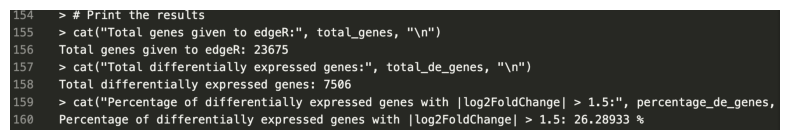

In [17]:
endgeR_output = mpimg.imread("images/edgeR_output.png")
width = 10
plt.figure(figsize=(width, endgeR_output.shape[0] / endgeR_output.shape[1] * width))
plt.imshow(endgeR_output)
plt.axis('off')
plt.show()

#### 1. How many genes are given to edgeR? How many of them are differentially expressed in tumor versus normal samples? How do you define statistical significance in this context?

As the above output indocates, total number of genes are given to edgeR is **23675** while the total number of genese in the main matrix is **37363**.

The "Total differentially expressed genes" represents the number of genes that we've identified as showing significant changes in their activity between tumor and normal samples. These genes might be working more or less in tumor cells compared to normal cells. However, this number doesn't necessarily tell us how many different genes are present in tumor and normal samples overall—it just tells us how many genes are acting differently between the two types of samples based on our analysis criteria. So, it's a specific subset of genes, not all of them. And by the result of the R code shown above, the number of total differentially expressed genes is **7506**. 

Statistical significance in this context means how confident we are that the differences we see in gene activity between tumor and normal samples are real and not just random chance. 
We measure this confidence using a number called the false discovery rate (FDR). When we say a gene is "differentially expressed with statistical significance," it means that the chance of seeing the observed difference in gene activity between tumor and normal samples, or even a more extreme difference, by random chance alone is very low, typically less than 0.05. 
So, if a gene is labeled as statistically significant, we're pretty sure that the change in activity we're seeing is because of the difference between tumor and normal samples, not just random fluctuations in the data.
<hr>

#### 2. Determine the percentage of differentially expressed genes with |log2FoldChange| > 1.5.

Based on the output of R code, percentage of differentially expressed genes with |log2FoldChange| > 1.5 is **26.28933%**.
<hr>

#### 3. Explain the difference between P-value and FDR?

The difference between P-value and FDR lies in how they're used in statistical analysis.

P-value tells us the likelihood of getting a result at least as extreme as what we observed, assuming there's no real effect. It helps us judge the strength of evidence against a specific idea, like whether a treatment works.

FDR, or False Discovery Rate, is about controlling the number of false discoveries we make when we test many hypotheses at once. It gives us an idea of how many of the significant results we find might be wrong. FDR-adjusted p-values help keep this rate low, so we can trust our findings more.

So, P-value is about individual tests, while FDR looks at the bigger picture across multiple tests.

Also, for interpreting the samples, we can use the below volcano plot:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


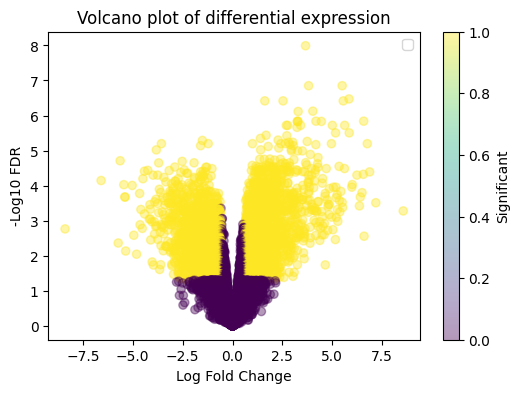

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data frame
results_df = pd.read_csv('differential_expressed_genes.csv')

# Create the volcano plot
plt.figure(figsize=(6, 4))
plt.scatter(results_df['logFC'], -np.log10(results_df['FDR']), c=results_df['Significant'], alpha=0.4)
plt.xlabel('Log Fold Change')
plt.ylabel('-Log10 FDR')
plt.title('Volcano plot of differential expression')
plt.colorbar(label='Significant')
plt.legend()
plt.savefig('volcano_plot.png', dpi=300)
plt.show()


Les's interpret the above plot:

1. **Top Corners:** Genes way up high and far to the left or right are super important. They're not only different between conditions (normal and tumor), but they're also changed a lot. So, they're both significant and have a big difference.
  
2. **Upper Middle:** Genes that are high up but closer to the middle might not change as much between conditions, but they're still important because they're significantly different.
  
3. **Center:** Genes near the middle aren't really doing much differently between conditions. They're not considered important for the comparison you're making.

## Part e - Gene Ontology enrichment analysis

For this section, I tried to write an R program by help of chat GPT but I was not able to fix it's error and what i concluded was that there is a difference between the data I give to the functions and the things they want as input. The code does not run completely Althogh it tries to do the mapping in some levels, in the middle of way, it faces with the below error and I could not fix it.

Error in .testForValidKeys(x, keys, keytype, fks) : 
  None of the keys entered are valid keys for 'SYMBOL'. Please use the keys method to see a listing of valid arguments.
Calls: select ... select -> .select -> testSelectArgs -> .testForValidKeys
In addition: There were 50 or more warnings (use warnings() to see the first 50)
Execution halted

It is considerable that the matrix used in this section, was the matrix which is constructed in the previous part. The only extra thing is the last column which is obtained by mapping gene names and ids. And it is worth to mention that there are some genes which are not mapped to any gene ids. To make the data cleaner and more accptalbe for the function ```goseq```, I removed these lines and the results of runnig the code improved but the error was not fixed yet.

path do results:

fastQC results: ```/share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/fastqc_results```

hisat results: ```/share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/hisat```

htseq-count results: ```/share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/htseq_counts``` 

mapping statistics results: ```/share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/mapping_stats```

reference index: ```/share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/reference_index```

trimming results: ```/share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimming_results```

trimmed fastqc results: ```/share_large/intro2bioinformatics/home/bio_fatemeh_rashidi/project2/trimmed_fastqc_results```